In [3]:
!pip install spacy
!pip install rdflib
!python -m spacy download en_core_web_sm
!pip install spacy rdflib SPARQLWrapper



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 15.5 MB/s eta 0:00:01
     ---- ----------------------------------- 1.4/12.8 MB 17.9 MB/s eta 0:00:01
     ------- -------------------------------- 2.5/12.8 MB 22.5 MB/s eta 0:00:01
     ----------- ---------------------------- 3.6/12.8 MB 23.2 MB/s eta 0:00:01
     -------------- ------------------------- 4.6/12.8 MB 22.6 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 26.2 MB/s eta 0:00:01
     ------------------------ --------------- 7.8/12.8 MB 27.7 MB/s eta 0:00:01
     -------------------------- ------------- 8.3/12.8 MB 28.1 MB/s eta 0:00:01
     ----------------------------- ---------- 9.3/12.8 MB 26.0 MB/s eta 0:00:01
     -------------------------------- ------ 10.8/12.8 MB 27.3 MB/s eta 0:00:01
     --------------------------------------  12.5/12.8 MB 31.2 MB/s eta 0:00:01
     --------------------------------------  12.


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import rdflib
import os
from rdflib.tools.rdf2dot import rdf2dot
from pydotplus import graph_from_dot_data
from IPython.display import Image, display
import io
import spacy


 inject the RDF vocabulary 
 RDF data will be parsed and stored into an RDFLib graph object, which can then be queried or manipulated as needed .
  Read and Parse RDF Files &Serialize the Combined Graph

In [5]:
g = rdflib.Graph()
directory_path = r"C:\Users\AAI47\poc2\flask-api\code\rdf"
print(directory_path)
for filename in os.listdir(directory_path):
    if filename.endswith(".rdf"):  
        file_path = os.path.join(directory_path, filename)
        g.parse(file_path, format='xml')

print(g.serialize(format='turtle'))


C:\Users\AAI47\poc2\flask-api\code\rdf
@prefix ds6w: <http://www.3ds.com/vocabularies/ds6w/> .
@prefix ds6w1: <http://www.w3.org/2002/07/ds6w/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pno: <http://www.3ds.com/vocabularies/pno/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix swym: <http://www.3ds.com/vocabularies/swym/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ds6w: a owl:Ontology ;
    rdfs:label "6W Vocabulary"@en ;
    rdfs:comment "This ontology defines the DS Corporate vocabulary for 6W tags."^^xsd:string ;
    owl:versionInfo "R2015x" .

ds6w:3dModel a owl:Class ;
    rdfs:label "3D Model"@en ;
    rdfs:comment "3D Model"^^xsd:string ;
    rdfs:subClassOf ds6w:Document .

ds6w:Drawing a owl:Class ;
    rdfs:label "Drawing"@en ;
    rdfs:comment "Drawing"^^xsd:string ;
    rdfs:subClassOf ds6w:Document .

ds6w:MiscDocument a owl:Class ;
    rdfs:label "Miscellaneoous Document"@en ;
    rdfs:comment "Miscellaneoous Document"^^xsd:str

In [6]:
# query = """
# SELECT ?subclass ?label WHERE {
#   ?subclass rdfs:subClassOf swym:RichMedia .
#   ?subclass rdfs:label ?label .
# }
# """

# query="""SELECT ?property ?label ?comment WHERE {
#   ?property rdf:type owl:DatatypeProperty .
#   ?property rdfs:label ?label .
#   ?property rdfs:comment ?comment .
# }"""


query = """
SELECT ?subject ?predicate  ?object
WHERE {
  ?subject ?predicate ?object .
}
"""

# Execute the query
for row in g.query(query):
    print(row.subject, row.object)
# query="""SELECT ?document WHERE {
#   ?document rdf:type <http://example.org/Document> .
#   ?document dc:creator "Alice" .
#   ?document dc:date ?date .
#   FILTER (YEAR(?date) = 2021)
# }"""
for row in g.query(query):
    print(row)

http://www.3ds.com/vocabularies/swym/DirectMessage Direct Message
http://www.3ds.com/vocabularies/swym/Idea Idea
http://www.3ds.com/vocabularies/ds6w/community http://www.w3.org/2001/XMLSchema#string
http://www.3ds.com/vocabularies/swym/Community http://www.w3.org/2002/07/owl#Class
http://www.3ds.com/vocabularies/ds6w/Drawing http://www.w3.org/2002/07/owl#Class
http://www.3ds.com/vocabularies/swym/Drawing Drawing
http://www.3ds.com/vocabularies/ds6w/publishedBy http://www.w3.org/2001/XMLSchema#string
http://www.3ds.com/vocabularies/ds6w/3dModel http://www.w3.org/2002/07/owl#Class
http://www.3ds.com/vocabularies/ds6w/person http://www.w3.org/2001/XMLSchema#string
http://www.3ds.com/vocabularies/ds6w/question http://www.w3.org/2002/07/owl#DatatypeProperty
http://www.3ds.com/vocabularies/ds6w/ This ontology defines the DS Corporate vocabulary for 6W tags.
http://www.3ds.com/vocabularies/swym/Sound http://www.3ds.com/vocabularies/swym/RichMedia
http://www.3ds.com/vocabularies/ds6w/responsi

In [7]:
from rdflib import Graph, URIRef


def print_triples(graph):
    for s, p, o in graph:
        subject = str(s).split('/')[-1]  
        predicate = str(p).split('/')[-1]
        object = str(o).split('/')[-1] if isinstance(o, URIRef) else str(o)
        print(f"({subject}, {predicate}, {object})")
print_triples(g)


(DirectMessage, rdf-schema#label, Direct Message)
(Idea, rdf-schema#label, Idea)
(community, rdf-schema#range, XMLSchema#string)
(Community, 22-rdf-syntax-ns#type, owl#Class)
(Drawing, 22-rdf-syntax-ns#type, owl#Class)
(Drawing, rdf-schema#label, Drawing)
(publishedBy, rdf-schema#range, XMLSchema#string)
(3dModel, 22-rdf-syntax-ns#type, owl#Class)
(person, rdf-schema#range, XMLSchema#string)
(question, 22-rdf-syntax-ns#type, owl#DatatypeProperty)
(, rdf-schema#comment, This ontology defines the DS Corporate vocabulary for 6W tags.)
(Sound, rdf-schema#subClassOf, RichMedia)
(responsible, rdf-schema#range, XMLSchema#string)
(DirectMessage, rdf-schema#comment, A 3DSwym direct message)
(Picture, 22-rdf-syntax-ns#type, owl#Class)
(3dModel, rdf-schema#comment, 3D Model)
(docExtension, rdf-schema#range, XMLSchema#string)
(Story, rdf-schema#label, Story)
(businessRole, rdf-schema#range, XMLSchema#string)
(whyCommunityTag, 22-rdf-syntax-ns#type, owl#DatatypeProperty)
(endorsements, rdf-schema#r

Test : Inject turtle rdf datamodel to graph and verify

In [12]:
turtle_data="""
   
** RDF Data Model and Ontology **
 @prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix dsqt: <http://www.3ds.com/RDF/Corpus/dsqt/> .
@prefix ds6w: <http://www.3ds.com/vocabularies/ds6w/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix pno: <http://www.3ds.com/vocabularies/pno/> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix swym: <http://www.3ds.com/vocabularies/swym/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

ds6w: a owl:Ontology ;
    rdfs:label "6W Vocabulary"@en ;
    rdfs:comment "This ontology defines the DS Corporate vocabulary for 6W tags."^^xsd:string ;
    owl:versionInfo "R2015x" .

pno: a owl:Ontology ;
    rdfs:label "3DS PnO Vocabulary"@en ;
    rdfs:comment "This ontology defines the DS People and Organization vocabulary."^^xsd:string ;
    owl:versionInfo "R2016x" .

swym: a owl:Ontology ;
    rdfs:label "3DSwym Vocabulary"@en ;
    rdfs:comment "This ontology defines 3DSwym vocabulary for 6W tags."^^xsd:string ;
    owl:versionInfo "R2016x" .

VpmReference a owl:Class ;
    rdfs:label "VpmReference"@en ;
    rdfs:comment "Physical Product archetype. Represents physical products within the system and is equivalent to any general product classification."@en .

pno:Person a owl:Class ;
    rdfs:label "Person"@en ;
    rdfs:comment "Represents an individual person."@en .

physicalProduct:PhysicalProduct a owl:Class ;
    owl:equivalentClass VpmReference:VPMReference .

Document a owl:Class ;
    rdfs:comment "General class for documents."@en .

swym:Post a owl:Class ;
    rdfs:subClassOf SocialContent ;
    rdfs:comment "A post within the social collaboration platform."@en .
        
swym:Idea a owl:Class ;
    rdfs:subClassOf SocialContent ;
    rdfs:comment "An idea within the social collaboration platform."@en .

"""
g = rdflib.Graph()

g.parse(data=turtle_data, format="turtle")

print(g.serialize(format='turtle'))


BadSyntax: at line 3 of <>:
Bad syntax (expected directive or statement) at ^ in:
"b'\n   \n'^b'** RDF Data Model and Ontology **\n @prefix rdf: <http://www.'..."

: 

function to visualize the injected graph

graphe [(rdflib.term.URIRef('http://www.3ds.com/vocabularies/swym/Question'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Question', lang='en')), (rdflib.term.URIRef('http://www.3ds.com/vocabularies/ds6w/dataSource'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#range'), rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')), (rdflib.term.URIRef('http://www.3ds.com/vocabularies/swym/Document'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subClassOf'), rdflib.term.URIRef('http://www.3ds.com/vocabularies/swym/RichMedia')), (rdflib.term.URIRef('http://www.3ds.com/vocabularies/ds6w/Document'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.term.Literal('Document', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))), (rdflib.term.URIRef('http://www.3ds.com/vocabularies/swym/DirectMessage'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#comment'), rdflib.ter

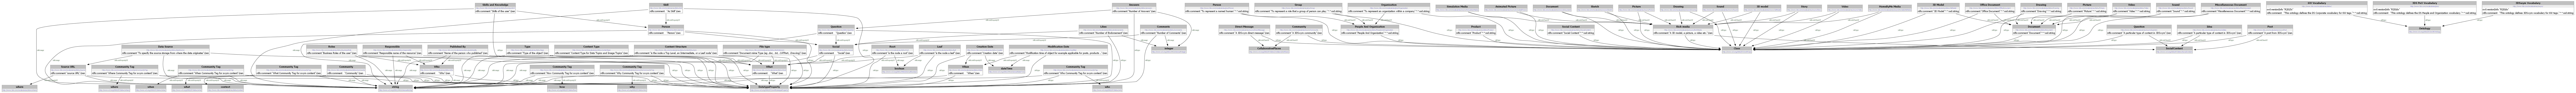

In [ ]:
def visualize_graph(graph):
    stream = io.StringIO()
    rdf2dot(graph, stream)
    dot_data = stream.getvalue()

    pydot_graph = graph_from_dot_data(dot_data)
    png_image = pydot_graph.create_png()
    display(Image(data=png_image))
    
print("graphe",list(g)[:10])

visualize_graph(g)

Get properties associated with given uri

In [ ]:
from rdflib import Graph, URIRef, Namespace

def get_properties_of_class(class_uri):
    properties = {}
    # Properties where class is the subject
    for p, o in g.predicate_objects(class_uri):
        pred = str(p).split('/')[-1]  
        obj = str(o)
        properties[pred] = obj
    
    # properties where class is the object
    for s, p in g.subject_predicates(class_uri):
        subj = str(s).split('/')[-1] 
        pred = str(p).split('/')[-1]
        properties[pred] = subj
    return properties

class_uri = "http://www.3ds.com/vocabularies/ds6w/person"
properties = get_properties_of_class(class_uri)
print(f"Properties associated with {class_uri}:",properties)


Properties associated with http://www.3ds.com/vocabularies/ds6w/person: {}


Construct a new graph (subject,predicat, object)
Where subjects/objects are class , predicat are the props

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for s, p, o in g:
    if p == rdflib.RDF.type and o == rdflib.OWL.Class:
        class_label = g.value(s, rdflib.RDFS.label, default=None)
        if class_label:
            G.add_node(str(class_label), color='lightblue')

    elif p in [rdflib.RDFS.domain, rdflib.RDFS.range]:
        prop_label = g.value(s, rdflib.RDFS.label, default=None)
        if prop_label:
            domain_classes = list(g.objects(s, rdflib.RDFS.domain))
            range_classes = list(g.objects(s, rdflib.RDFS.range))

            for dc in domain_classes:
                domain_label = g.value(dc, rdflib.RDFS.label, default=str(dc))
                for rc in range_classes:
                    range_label = g.value(rc, rdflib.RDFS.label, default=str(rc))
                    G.add_node(domain_label, color='lightblue')
                    G.add_node(range_label, color='lightgreen')
                    G.add_edge(domain_label, range_label, label=str(prop_label))

# Draw the graph
visualize_graph(G)
print(G)


ValueError: too many values to unpack (expected 3)

RUNTIME

#### Step 2: Natural Language Processing (NLP)

 Tokenization: Breaking down the sentence into words or phrases.

 Part-of-Speech Tagging: Identifying parts of speech (nouns, verbs, adjectives, etc.).

 Dependency Parsing: Analyzing the grammatical structure to find relationships between words.

 Named Entity Recognition (NER): Identifying and categorizing key entities in the text (like dates, names, or specialized terms relevant to your RDF schema).

 Intent Recognition: Determining what action the user intends (e.g., retrieving data, updating records).
 

In [ ]:

nlp = spacy.load("en_core_web_sm")

def process_query(query):
    doc = nlp(query)
    #stop word removal missing 
    tokens = [(token.text, token.pos_) for token in doc]
    print("Tokens and POS Tags:", tokens)
    
    dependencies = [(token.text, token.dep_, token.head.text) for token in doc]
    print("Dependencies:", dependencies)
    
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    print("Named Entities:", entities)
    
    return tokens, dependencies, entities

query = "Launch a simulation on content design I created yesterday"
process_query(query)


Tokens and POS Tags: [('Launch', 'VERB'), ('a', 'DET'), ('simulation', 'NOUN'), ('on', 'ADP'), ('content', 'NOUN'), ('design', 'NOUN'), ('I', 'PRON'), ('created', 'VERB'), ('yesterday', 'NOUN')]
Dependencies: [('Launch', 'ROOT', 'Launch'), ('a', 'det', 'simulation'), ('simulation', 'dobj', 'Launch'), ('on', 'prep', 'simulation'), ('content', 'compound', 'design'), ('design', 'pobj', 'on'), ('I', 'nsubj', 'created'), ('created', 'relcl', 'simulation'), ('yesterday', 'npadvmod', 'created')]
Named Entities: [('Launch', 'NORP'), ('yesterday', 'DATE')]


([('Launch', 'VERB'),
  ('a', 'DET'),
  ('simulation', 'NOUN'),
  ('on', 'ADP'),
  ('content', 'NOUN'),
  ('design', 'NOUN'),
  ('I', 'PRON'),
  ('created', 'VERB'),
  ('yesterday', 'NOUN')],
 [('Launch', 'ROOT', 'Launch'),
  ('a', 'det', 'simulation'),
  ('simulation', 'dobj', 'Launch'),
  ('on', 'prep', 'simulation'),
  ('content', 'compound', 'design'),
  ('design', 'pobj', 'on'),
  ('I', 'nsubj', 'created'),
  ('created', 'relcl', 'simulation'),
  ('yesterday', 'npadvmod', 'created')],
 [('Launch', 'NORP'), ('yesterday', 'DATE')])

#### Step 3: Mapping to RDF Concepts
Once the query is parsed, the next step is to map the extracted entities and concepts to those defined in RDF model:

Entity Linking: Link named entities to corresponding entities in your RDF model.

Property and Class Mapping: Map nouns and adjectives to relevant RDF classes and properties.

Construct SPARQL Query: Build a SPARQL query based on the mapped entities, properties, and the intent identified. This involves selecting the appropriate RDF triples and constructing a query that reflects the user's request.

## converting NLQ to pseudo graph
#### Step 1: Natural Language Processing (NLP)
First, apply NLP techniques to analyze the syntactic and semantic structure of the NLQ. This involves:

Tokenization: Breaking down the text into individual words or tokens.
Part-of-Speech Tagging: Identifying the grammatical role of each token (noun, verb, adjective, etc.).
Dependency Parsing: Establishing the grammatical relationships between tokens, determining how tokens are connected to form phrases and clauses.
Named Entity Recognition (NER): Identifying and classifying proper nouns into predefined categories such as names, organizations, locations, etc.
Semantic Role Labeling (SRL): Understanding the semantic roles that tokens play in sentences, identifying actions (verbs) and their arguments (entities or phrases linked to the verb expressing roles like agent, theme, instrument, etc.).
Step 2: Graph Nodes and Edges Creation
From the NLP analysis, extract elements to form nodes and edges in the pseudo-graph:

Nodes: Represent entities (from NER) and key nouns or noun phrases. Each node can be labeled with the entity type or noun.
Edges: Represent verbs (actions) or relationships (from dependency parsing and SRL). Edges connect nodes and are labeled with the verb or the nature of the relationship (e.g., "owns", "created by").
Step 3: Constructing the Pseudo-Graph
Using the nodes and edges identified:

Initialize Graph: Define a graph structure, possibly using a library like networkx in Python, which can store nodes and edges along with their attributes.
Add Nodes and Edges: Populate the graph with nodes and their labels, and connect nodes with directed edges that reflect the relationships and actions identified from the NLQ.

Graph Complexity: Depending on the complexity of the NLQ, the graph might need to include more sophisticated semantic roles and relations.
Handling Ambiguity: NLQs can be ambiguous. It might be necessary to include probabilistic or context-aware methods to determine the most likely structure.
Multi-Sentence Queries: For NLQs that span multiple sentences, you may need to identify relationships across sentences, requiring more advanced NLP techniques like coreference resolution.

### with considerations notes above

Show
me
documents
created
by
Alice
yesterday
.


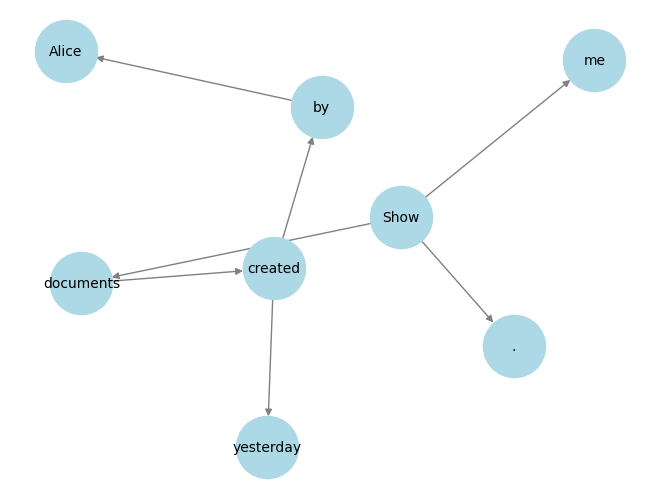

In [ ]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

def process_text_to_graph(text):
    doc = nlp(text)
    nlqG = nx.DiGraph()
    #Missing: use of the process_query (to add later)
    # handling tokens and creating nodes based on POS tagging and named entities
    for token in doc:
        print(token)
        if token.pos_ in ['NOUN', 'PROPN'] or token.ent_type_:
            # ensure each entity is only added once
            if token.text not in nlqG:
                nlqG.add_node(token.text, role='entity', entity=token.ent_type_ or token.pos_)
        
        # Adding modifiers
        if token.dep_ in ['amod', 'advmod'] and token.head.pos_ in ['NOUN', 'PROPN']:
            if token.text not in nlqG:
                nlqG.add_node(token.text, role='modifier', modifies=token.head.text)
            nlqG.add_edge(token.head.text, token.text, relation=token.dep_)

    # Creating edges based on dependency parsing
    for token in doc:
        if token.head != token:
            nlqG.add_edge(token.head.text, token.text, relation=token.dep_)

    # Special handling for verb subjects and objects to ensure they are linked
    for token in doc:
        if token.pos_ == 'VERB':
            subjects = [child for child in token.children if child.dep_ == 'nsubj']
            objects = [child for child in token.children if child.dep_ == 'dobj']
            for subj in subjects:
                nlqG.add_edge(subj.text, token.text, relation='subject')
            for obj in objects:
                nlqG.add_edge(token.text, obj.text, relation='object')
            # # Handling prepositions specifically
            # for child in token.children:
            #     if child.dep_ == 'prep':
            #         for grandchild in child.children:
            #             if grandchild.dep_ == 'pobj':
            #                 nlqG.add_edge(token.text, grandchild.text, relation=f"{child.text}_{grandchild.dep_}")

    return nlqG

text = "Show me documents created by Alice yesterday."

nlqG = process_text_to_graph(text)
# print("nodes",nlqG.all_nodes)
# print("edges",g.edges)

# Draw  graph
pos = nx.spring_layout(nlqG, k=1)  
nx.draw(nlqG, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10)
plt.show()


1. Automated Mapping with Metadata
Use metadata from  RDF schema to dynamically map NLQ elements to RDF classes and properties.

Extracting Schema Information: Programmatically extracting RDF schema information like classes, properties, and their relationships. This can be done using SPARQL queries against the RDF schema or ontology itself if it’s stored in a SPARQL-accessible format.


Schema-Based Mapping Function: mapping function that uses the schema metadata to match NLQ elements to RDF elements based on similarity metrics (e.g., string similarity, semantic similarity).

In [ ]:
import rdflib
from fuzzywuzzy import fuzz

def extract_schema_metadata(graph):
 
    query = """  
    SELECT ?class ?property WHERE {
        { ?class a owl:Class. }
        UNION
        { ?property a rdf:Property. }
        UNION
        { ?property a owl:ObjectProperty. }
        UNION
        { ?property a owl:DatatypeProperty. }
    }
    """
    
    result = graph.query(query)
    schema_elements = {'classes': set(), 'properties': set()}
    for row in result:
        if row['class']:
            schema_elements['classes'].add(str(row['class']))
        if row['property']:
            schema_elements['properties'].add(str(row['property']))
    
    return schema_elements

schema_metadata = extract_schema_metadata(g)
print("Schema Classes:", schema_metadata)
print("Schema Properties:", schema_metadata['properties'])


Schema Classes: {'classes': {'http://www.3ds.com/vocabularies/swym/Story', 'http://www.3ds.com/vocabularies/swym/Video', 'http://www.3ds.com/vocabularies/swym/3dModel', 'http://www.3ds.com/vocabularies/ds6w/3dModel', 'http://www.3ds.com/vocabularies/ds6w/Video', 'http://www.3ds.com/vocabularies/pno/Group', 'http://www.3ds.com/vocabularies/swym/Picture', 'http://www.3ds.com/vocabularies/swym/RichMedia', 'http://www.3ds.com/vocabularies/swym/Sound', 'http://www.3ds.com/vocabularies/ds6w/OfficeDocument', 'http://www.3ds.com/vocabularies/swym/Community', 'http://www.3ds.com/vocabularies/swym/HomeByMeMedia', 'http://www.3ds.com/vocabularies/ds6w/Document', 'http://www.3ds.com/vocabularies/ds6w/PeopleAndOrganization', 'http://www.3ds.com/vocabularies/swym/DirectMessage', 'http://www.3ds.com/vocabularies/swym/Drawing', 'http://www.3ds.com/vocabularies/swym/Sketch', 'http://www.3ds.com/vocabularies/ds6w/Sound', 'http://www.3ds.com/vocabularies/ds6w/Drawing', 'http://www.3ds.com/vocabularies/pn

FIrst Approach :map NLQ to RDD using fuzz : Simple string similarity

In [ ]:
def map_nlq_to_rdf(nlq_elements, schema_metadata):
    mapped_elements = {}
    for element in nlq_elements:
        highest_score = 0
        best_match = None
        for schema_element in schema_metadata['classes'].union(schema_metadata['properties']):
            score = fuzz.token_sort_ratio(element, schema_element.split('/')[-1])  
            print(f"Matching {element} to {schema_element.split('/')[-1]}: score={score}")

            if score > highest_score:
                highest_score = score
                best_match = schema_element
        print(f"Best match for {element}: {best_match} with score {highest_score}")
        # Threshold to determine a match (min =30)
        if highest_score > 30: 
            mapped_elements[element] = best_match
    return mapped_elements

nlq_elements = ['documents', 'created','yesterday']
mapped_elements = map_nlq_to_rdf(nlq_elements, schema_metadata)
print(mapped_elements)

Matching documents to docExtension: score=57
Matching documents to whoCommunityTag: score=42
Matching documents to Story: score=14
Matching documents to Video: score=29
Matching documents to type: score=15
Matching documents to responsible: score=20
Matching documents to businessRole: score=19
Matching documents to what: score=15
Matching documents to 3dModel: score=38
Matching documents to answers: score=25
Matching documents to 3dModel: score=38
Matching documents to Video: score=29
Matching documents to Group: score=29
Matching documents to endorsements: score=67
Matching documents to Picture: score=38
Matching documents to RichMedia: score=33
Matching documents to Sound: score=14
Matching documents to whyCommunityTag: score=33
Matching documents to dataSource: score=42
Matching documents to OfficeDocument: score=70
Matching documents to source: score=40
Matching documents to whenCommunityTag: score=24
Matching documents to Community: score=44
Matching documents to HomeByMeMedia: sc

Step 2: Extract RDF Labels for Matching


In [ ]:
import rdflib

labels = set()
for s, p, o in g.triples((None, rdflib.RDFS.label, None)):
    if isinstance(o, rdflib.Literal) and o.language == "en":
        labels.add((str(s), str(o)))

print(f"Extracted {len(labels)} unique labels from RDF.")
print(labels)


Extracted 65 unique labels from RDF.
{('http://www.3ds.com/vocabularies/swym/whenCommunityTag', 'Community Tag'), ('http://www.3ds.com/vocabularies/ds6w/endorsements', 'Likes'), ('http://www.3ds.com/vocabularies/ds6w/person', 'Person'), ('http://www.3ds.com/vocabularies/ds6w/when', 'When'), ('http://www.3ds.com/vocabularies/pno/Group', 'Group'), ('http://www.3ds.com/vocabularies/ds6w/source', 'Source URL'), ('http://www.3ds.com/vocabularies/ds6w/Sound', 'Sound'), ('http://www.3ds.com/vocabularies/ds6w/businessRole', 'Roles'), ('http://www.3ds.com/vocabularies/swym/Document', 'Document'), ('http://www.3ds.com/vocabularies/ds6w/3dModel', '3D Model'), ('http://www.3ds.com/vocabularies/ds6w/modified', 'Modification Date'), ('http://www.3ds.com/vocabularies/ds6w/leaf', 'Leaf'), ('http://www.3ds.com/vocabularies/ds6w/root', 'Root'), ('http://www.3ds.com/vocabularies/ds6w/type', 'Type'), ('http://www.3ds.com/vocabularies/ds6w/', '6W Vocabulary'), ('http://www.3ds.com/vocabularies/swym/Questio

Second Approach: using TFIDF and COSINE SIMILARITY

extracting RDF schema metadata and mapping natural language query (NLQ) elements to RDF elements using TF-IDF and cosine similarity, we will make several adjustments. We'll modify the SPARQL query to extract not only classes and properties but also their comments (which can provide contextual information). Then, we'll use TF-IDF to vectorize these texts and cosine similarity for matching, replacing FuzzyWuzzy, which is less effective for this kind of semantic text matching.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def extract_schema_metadata(graph):
    query = """
    SELECT ?entity ?label ?comment WHERE {
        {
            ?entity a owl:Class .
            OPTIONAL { ?entity rdfs:label ?label . }
            OPTIONAL { ?entity rdfs:comment ?comment . }
        } UNION {
            ?entity a rdf:Property .
            OPTIONAL { ?entity rdfs:label ?label . }
            OPTIONAL { ?entity rdfs:comment ?comment . }
        } UNION {
            ?entity a owl:ObjectProperty .
            OPTIONAL { ?entity rdfs:label ?label . }
            OPTIONAL { ?entity rdfs:comment ?comment . }
        } UNION {
            ?entity a owl:DatatypeProperty .
            OPTIONAL { ?entity rdfs:label ?label . }
            OPTIONAL { ?entity rdfs:comment ?comment . }
        }
    }
    """
    
    result = graph.query(query)
    schema_elements = {'entities': {}}
    for row in result:
        entity = str(row.entity)
        label = str(row.label) if row.label else "No label"
        comment = str(row.comment) if row.comment else "No comment"
        combined_description = f"{label} {comment}".strip()

        schema_elements['entities'][entity] = combined_description
        print(f"Entity: {entity}, Combined Description: {combined_description}")

    return  schema_elements['entities'] 

schema_metadata = schema_metadata = extract_schema_metadata(g)


Entity: http://www.3ds.com/vocabularies/ds6w/PeopleAndOrganization, Combined Description: People And Organization People And Organization
Entity: http://www.3ds.com/vocabularies/ds6w/SocialContent, Combined Description: Social Content Social Content
Entity: http://www.3ds.com/vocabularies/ds6w/Document, Combined Description: Document Document
Entity: http://www.3ds.com/vocabularies/ds6w/3dModel, Combined Description: 3D Model 3D Model
Entity: http://www.3ds.com/vocabularies/ds6w/Drawing, Combined Description: Drawing Drawing
Entity: http://www.3ds.com/vocabularies/ds6w/Picture, Combined Description: Picture Picture
Entity: http://www.3ds.com/vocabularies/ds6w/OfficeDocument, Combined Description: Office Document Office Document
Entity: http://www.3ds.com/vocabularies/ds6w/MiscDocument, Combined Description: Miscellaneoous Document Miscellaneoous Document
Entity: http://www.3ds.com/vocabularies/ds6w/Sound, Combined Description: Sound Sound
Entity: http://www.3ds.com/vocabularies/ds6w/Vi

Normal nec in this step

query decomposition missing 

In [ ]:
def prepare_tfidf(schema_descriptions):
    tfidf_vectorizer = TfidfVectorizer()
    descriptions = list(schema_descriptions.values())
    tfidf_matrix = tfidf_vectorizer.fit_transform(descriptions)
    return tfidf_vectorizer, tfidf_matrix

def map_nlq_to_rdf(nlq_elements, schema_descriptions, tfidf_vectorizer, tfidf_matrix):
    mapped_elements = {}
    query_vector = tfidf_vectorizer.transform(nlq_elements)
    cosine_sim = cosine_similarity(query_vector, tfidf_matrix)

    for i, element in enumerate(nlq_elements):
        sim_scores = cosine_sim[i]
        if sim_scores.max() > 0.2:  
            best_idx = np.argmax(sim_scores)
            matched_entity = list(schema_descriptions.keys())[best_idx]
            mapped_elements[element] = (matched_entity, sim_scores.max())
            print(f"'{element}' matched with '{matched_entity}' (Score: {sim_scores.max():.2f})")
        else:
            print(f"No suitable match found for '{element}'")
            mapped_elements[element] = None

    return mapped_elements


tfidf_vectorizer, tfidf_matrix = prepare_tfidf(schema_metadata)
nlq="search documents created today"
[document, created; today]
nlq_elements = ["role ","txt","3dswym","ideas",'posts','document' ,'responsible','created by','created', 'type VPM reference', 'yesterday'," Asma"]
mapped_elements = map_nlq_to_rdf(nlq_elements, schema_metadata, tfidf_vectorizer, tfidf_matrix)
print("Mapped NLQ elements:", mapped_elements)


SyntaxError: invalid syntax (3557496748.py, line 28)

Fetch full arborescence for a given entity (where the entity is a subject or object)

Recursive function 

Op needed

In [ ]:
import rdflib
import networkx as nx
from graphviz import Digraph

def fetch_full_arborescence(graph, entity_uri):
    visited = set() 

    G = nx.DiGraph()

    def recursive_fetch(node, depth=0, max_depth=3):
        if node in visited or depth > max_depth:
            return
        visited.add(node)

        #  properties and relations where node is the subject
        for s, p, o in graph.triples((node,rdflib.RDFS.subClassOf, None)):
            if o not in visited:
                G.add_edge(str(s), str(o), label=str(p).split('/')[-1])
                recursive_fetch(o, depth + 1, max_depth)

        #  properties and relations where node is the object
        for s, p, o in graph.triples((None, None, node)):
            if s not in visited:
                G.add_edge(str(s), str(o), label=str(p).split('/')[-1])
                recursive_fetch(s, depth + 1, max_depth)

    start_node = rdflib.URIRef(entity_uri)
    recursive_fetch(start_node)
    return G

def visualize_graph(G):
    dot = Digraph(comment='Complete RDF Arborescence')
    for u, v, data in G.edges(data=True):
        sanitized_u = sanitize_uri(u)
        sanitized_v = sanitize_uri(v)
        sanitized_label = sanitize_uri(data['label'], is_label=True)

        dot.node(sanitized_u, sanitized_u.split('/')[-1].replace('_', ' '))
        dot.node(sanitized_v, sanitized_v.split('/')[-1].replace('_', ' '))
        dot.edge(sanitized_u, sanitized_v, label=sanitized_label)

    dot.render('output/full_arborescence', view=True)

def sanitize_uri(uri, is_label=False):
    if is_label:
        return uri.split('/')[-1].replace(':', '_').replace('#', '_').replace('/', '_')
    return uri.replace(':', '_').replace('#', '_').replace('/', '_')

mapped_entity_uri = 'http://www.3ds.com/vocabularies/swym/Post'  
G = fetch_full_arborescence(g, mapped_entity_uri)
visualize_graph(G)


emebdding the graph using tree lstm